# 插件：fy_eq 二维平衡分析 

## 主要功能

- 二维平衡分析
- 磁面平均
- 磁坐标转换 (TODO)


## 创建 `equilibrium` 实例
指定调用插件 `fy_eq` 的 `equilibrium` 实例。

In [1]:
from fytok.modules.Equilibrium import Equilibrium

equilibrium = Equilibrium({"code": {"name": "fy_eq"}}, "file+geqdsk://./data/g070754.05000#equilibrium")

2024-04-23 09:24:29,492 [    spdm]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = alpha  (spdm=beta extension=0.2.3.dev0+g2cc21ff.d20240223, imas_version=v3_38_1_dirty)

 Run by salmon at 2024-04-23T09:24:29.370323.
 Job ID: fytok_salmon_surface_3807

###################################################################################################

2024-04-23 09:24:29,685 [    spdm]     INFO: Load module fytok.plugins.equilibrium.fy_eq
2024-04-23 09:24:29,689 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2024-04-23 09:2

## 可视化 

### 2D 磁面

自动确定 磁轴 o-point，x-point，和最外层闭合磁面

In [2]:
%matplotlib inline

2024-04-23 09:24:29,737 [    spdm]     INFO: Load module spdm.view.view_matplotlib
2024-04-23 09:24:29,759 [    spdm]     INFO: Load module spdm.mesh.mesh_rectangular


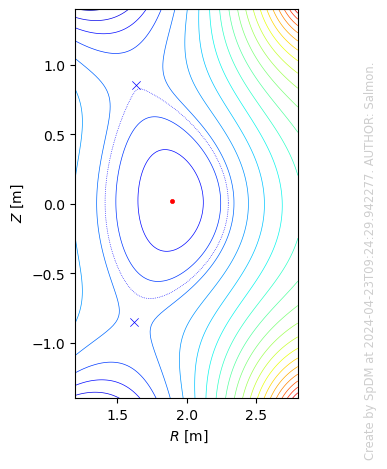

In [3]:
import spdm.view.View as sp_view

fig =sp_view.display(equilibrium)

### 1D 磁面坐标的函数

除了基础量 `ffprime`, `pprime`, 和二维 `psi`外，其他物理量都是通过计算得出的

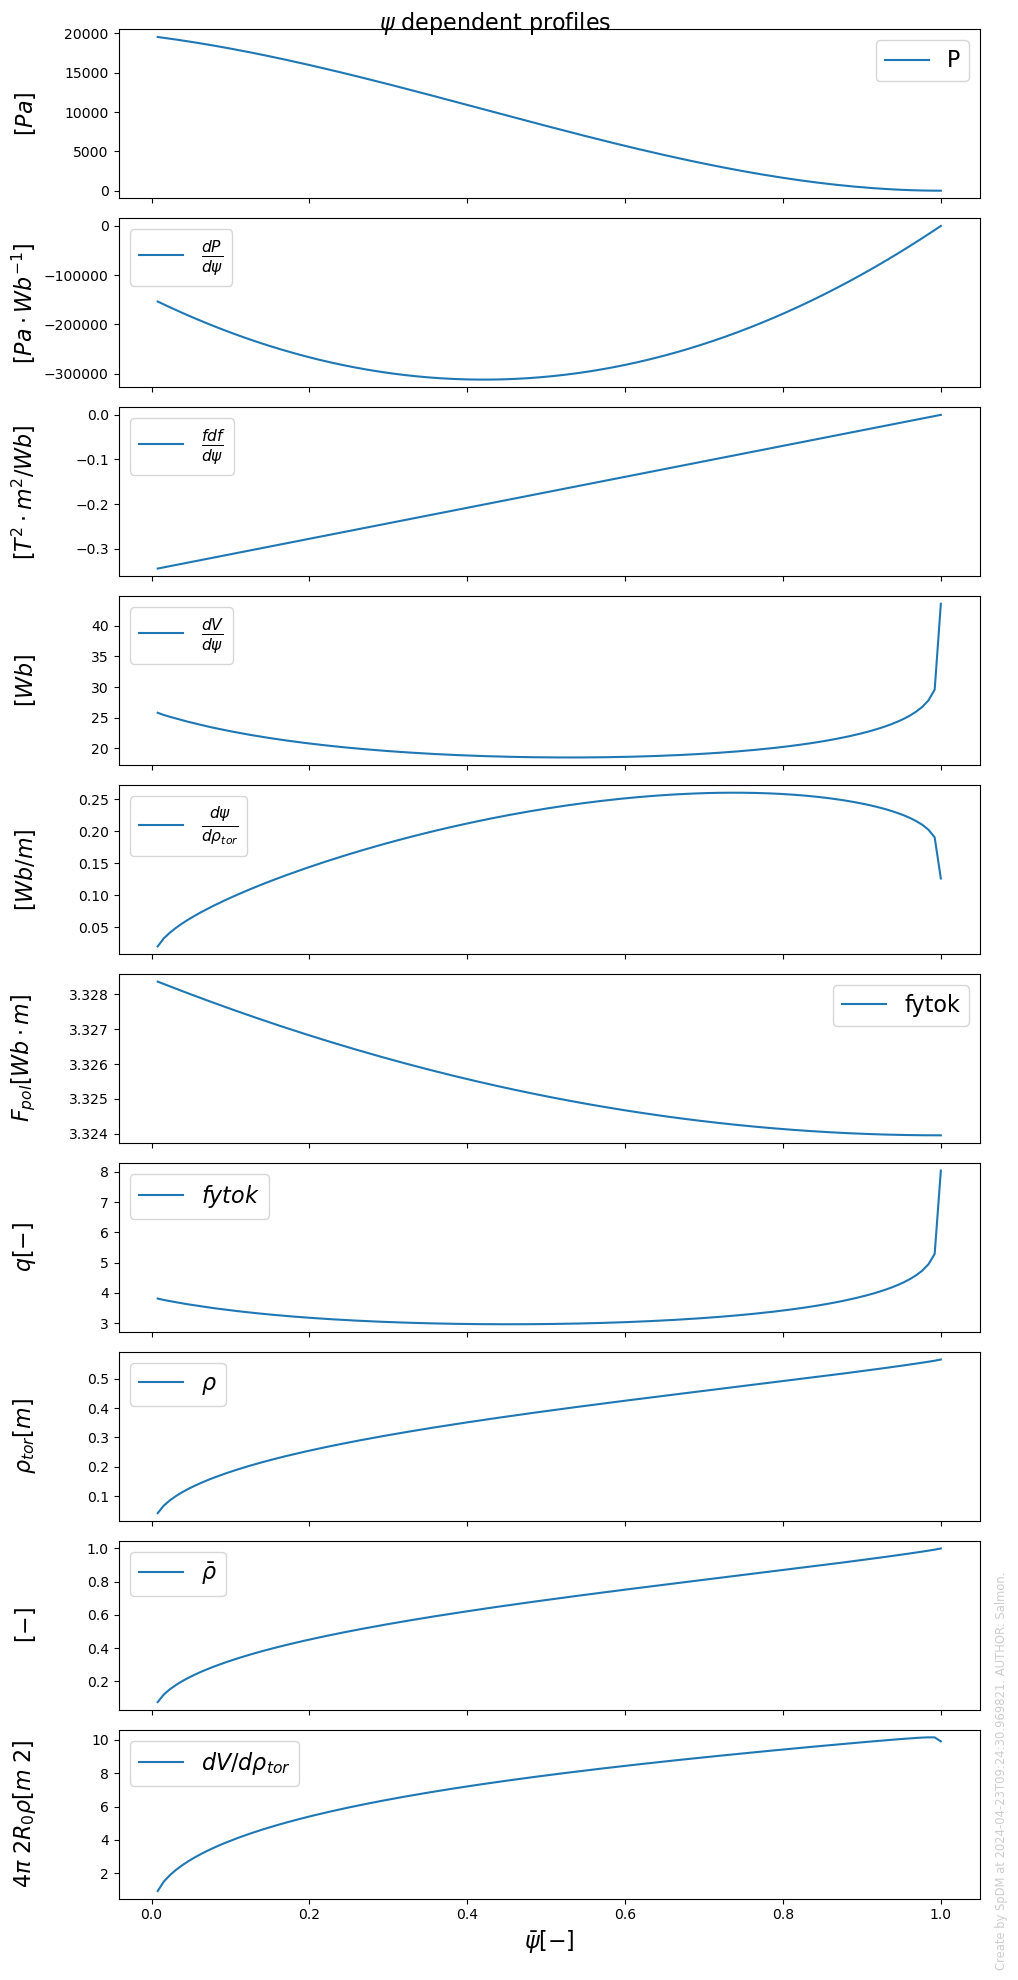

In [4]:
eq_profiles_1d = equilibrium.time_slice.current.profiles_1d

profs = sp_view.plot(
    eq_profiles_1d.psi_norm[1:],
    eq_profiles_1d.pressure,
    eq_profiles_1d.dpressure_dpsi,
    eq_profiles_1d.f_df_dpsi,
    ((eq_profiles_1d.dvolume_dpsi, {"label": r"$\frac{dV}{d\psi}$"}), {"y_label": r"$[Wb]$"}),
    (eq_profiles_1d.dpsi_drho_tor, {"label": r"$\frac{d\psi}{d\rho_{tor}}$"}),
    ((eq_profiles_1d.f, {"label": r"fytok"}), {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
    ((eq_profiles_1d.q, {"label": r"$fytok$"}), {"y_label": r"$q [-]$"}),
    ((eq_profiles_1d.rho_tor, {"label": r"$\rho$"}), {"y_label": r"$\rho_{tor}[m]$"}),
    ((eq_profiles_1d.rho_tor_norm, {"label": r"$\bar{\rho}$"}), {"y_label": r"[-]"}),
    ((eq_profiles_1d.dvolume_drho_tor, {"label": r"$dV/d\rho_{tor}$"}), {"y_label": r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),
    x_label=r"$\bar{\psi}[-]$",
    title=r"$\psi$ dependent profiles",
)

## 1D：磁面平均给出几何量

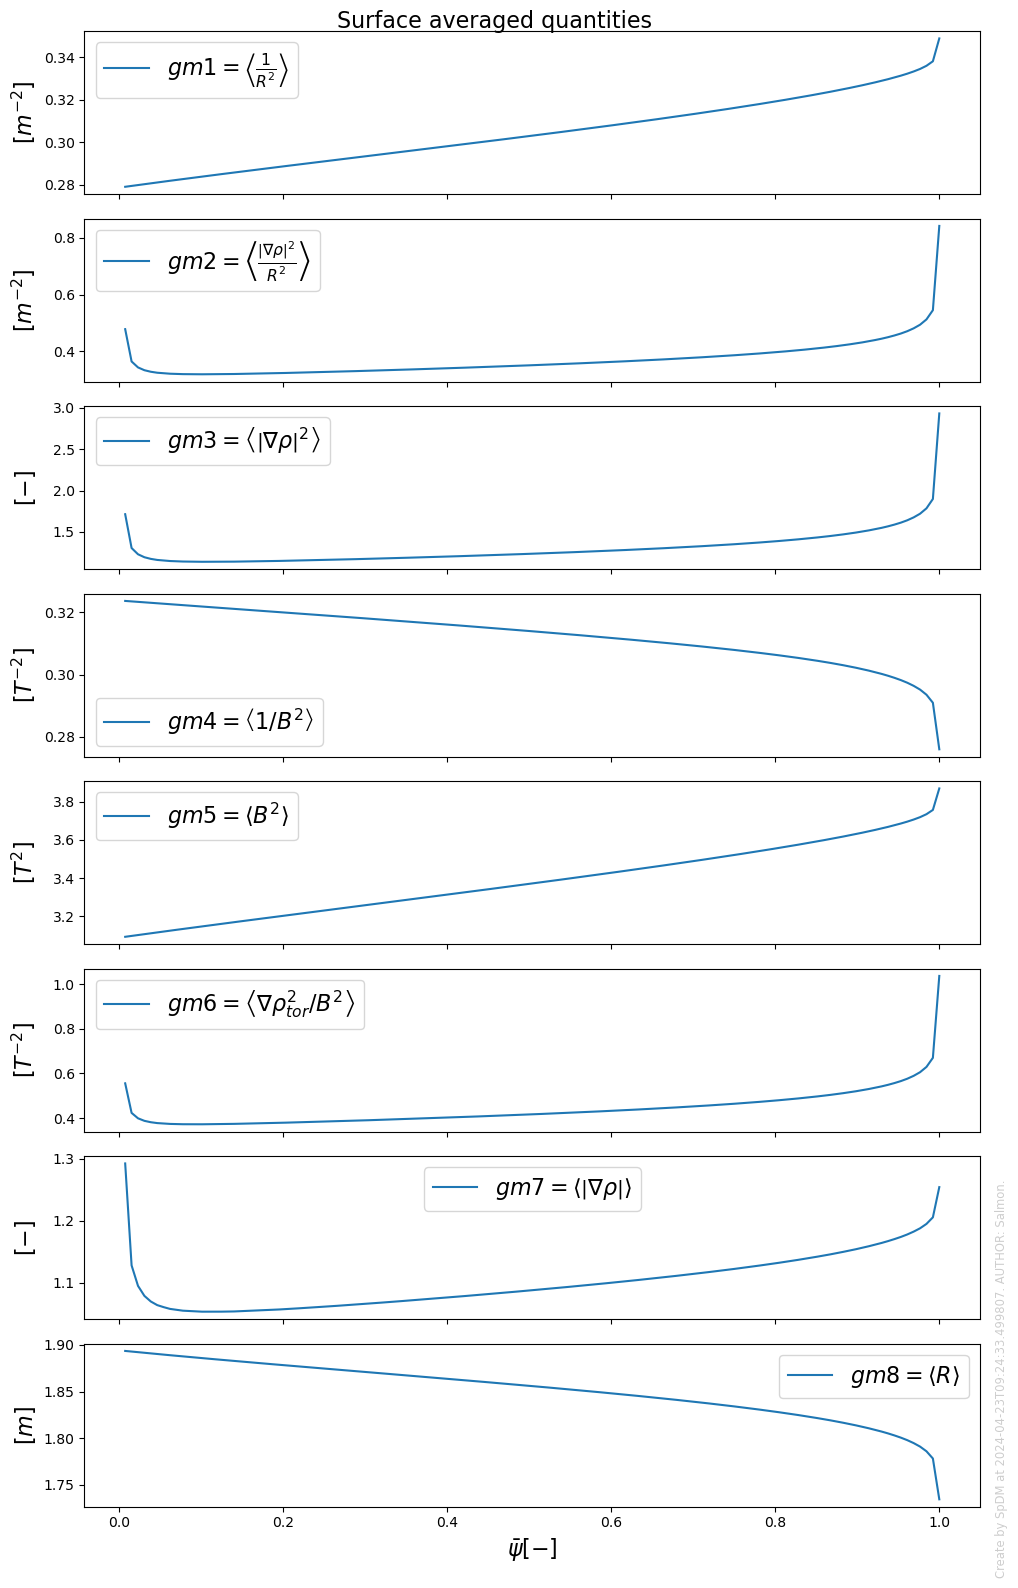

In [5]:
surfs = sp_view.plot(
    eq_profiles_1d.psi_norm[1:],
    (eq_profiles_1d.gm1, {"label": r"$gm1=\left<\frac{1}{R^2}\right>$"}),
    (eq_profiles_1d.gm2, {"label": r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"}),
    (eq_profiles_1d.gm3, {"label": r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"}),
    (eq_profiles_1d.gm4, {"label": r"$gm4=\left<1/B^2\right>$"}),
    (eq_profiles_1d.gm5, {"label": r"$gm5=\left<B^2\right>$"}),
    (eq_profiles_1d.gm6, {"label": r"$gm6=\left<\nabla \rho_{tor}^2/ B^2 \right>$"}),
    (eq_profiles_1d.gm7, {"label": r"$gm7=\left<\left|\nabla \rho\right|\right>$"}),
    (eq_profiles_1d.gm8, {"label": r"$gm8=\left<R\right>$"}),
    x_label=r"$\bar{\psi}[-]$",
    title=r"Surface averaged quantities",
)